In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#loading predefined Boston Dataset
boston_dataset = datasets.load_boston()

In [4]:
#load the datasets
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

#input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [11]:
#Apply multiple Linear Regression Model
Ireg = LinearRegression()
Ireg.fit(x_train, y_train)

#Generate prediction on test set
Ireg_y_pred = Ireg.predict(x_test)

#calculating Mean squared error(mse)
mean_squared_error = np.mean((Ireg_y_pred - y_test)**2)
print("Mean Squared Error on test set : ", mean_squared_error)

#putting together the coefficient and their corresponding variable names
Ireg_coefficient = pd.DataFrame()
Ireg_coefficient["Columns"] = x_train.columns
Ireg_coefficient['Coefficient Estimate'] = pd.Series(Ireg.coef_)
print(Ireg_coefficient)

Mean Squared Error on test set :  17.01212249633874
    Columns  Coefficient Estimate
0      CRIM             -0.077452
1        ZN              0.041123
2     INDUS              0.044095
3      CHAS              3.550122
4       NOX            -19.667723
5        RM              4.033776
6       AGE              0.011063
7       DIS             -1.384542
8       RAD              0.305648
9       TAX             -0.012316
10  PTRATIO             -1.076561
11        B              0.008597
12    LSTAT             -0.513480


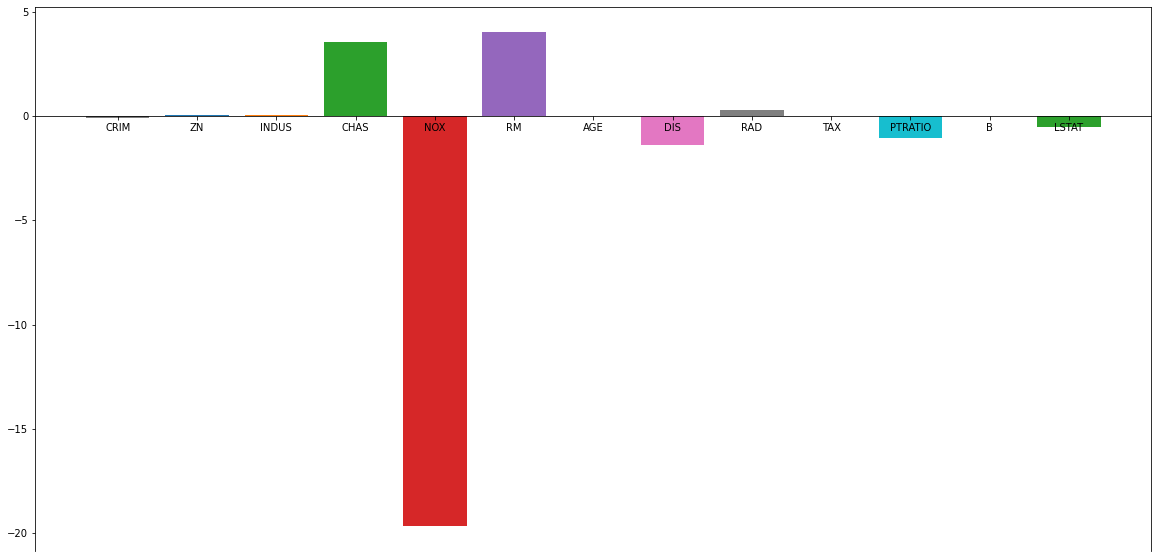

In [12]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize = (20,10))

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 
'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(Ireg_coefficient["Columns"],
Ireg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [15]:
#import ridge regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

#calculate the mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean squared error on test set",mean_squared_error_ridge)

#get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared error on test set 16.96481313911716
    Columns  Coefficient Estimate
0      CRIM             -0.067419
1        ZN              0.042451
2     INDUS              0.005365
3      CHAS              3.394187
4       NOX            -10.200854
5        RM              4.062143
6       AGE              0.003207
7       DIS             -1.245223
8       RAD              0.276133
9       TAX             -0.012888
10  PTRATIO             -0.980770
11        B              0.008585
12    LSTAT             -0.531383


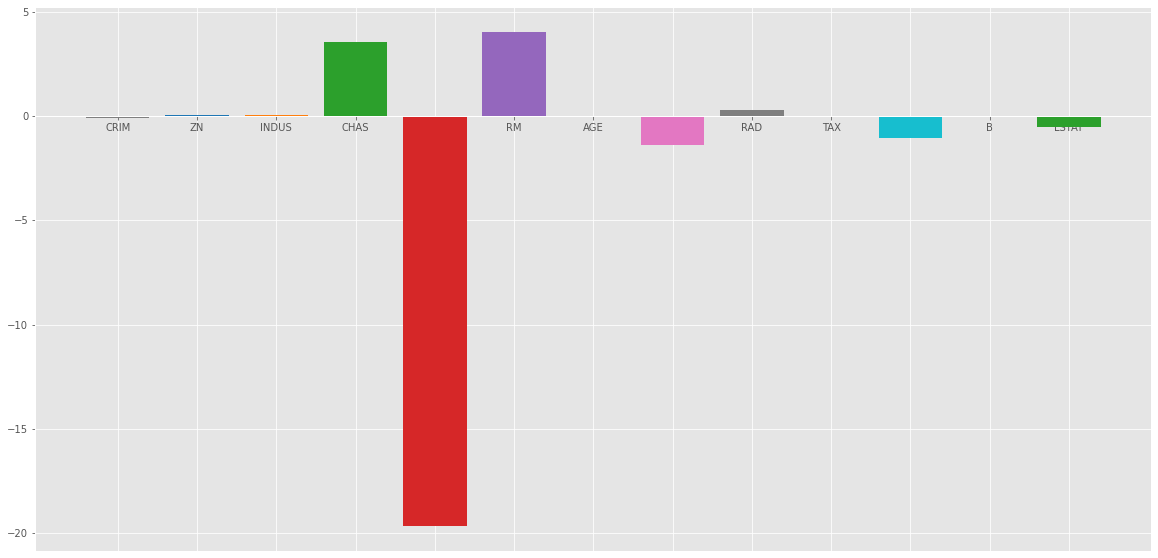

In [16]:
fig, ax = plt.subplots(figsize = (20,10))

color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 
'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(Ireg_coefficient["Columns"],
Ireg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()